In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_clahe(clip_limit, tile_size):
    """Applies CLAHE with the given parameters and updates the image."""
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=(tile_size, tile_size))
    enhanced_image = clahe.apply(image)
    cv2.imshow("CLAHE Enhanced Image", cv2.resize(enhanced_image, (400, 400)))

# Load thermal image (grayscale)
image = cv2.imread("image.png", cv2.IMREAD_GRAYSCALE)

# Create a window
cv2.namedWindow("CLAHE Enhanced Image", cv2.WINDOW_NORMAL)
cv2.resizeWindow("CLAHE Enhanced Image", 800, 600)

def on_trackbar(val):
    clip_limit = cv2.getTrackbarPos("Clip Limit", "CLAHE Enhanced Image") / 10.0
    tile_size = cv2.getTrackbarPos("Tile Size", "CLAHE Enhanced Image")
    tile_size = max(1, tile_size)  # Ensure tile size is at least 1
    apply_clahe(clip_limit, tile_size)

# Create trackbars
cv2.createTrackbar("Clip Limit", "CLAHE Enhanced Image", 20, 50, on_trackbar)  # Default 2.0, range 0.1-5.0
cv2.createTrackbar("Tile Size", "CLAHE Enhanced Image", 8, 32, on_trackbar)  # Default 8, range 1-32

# Initial call to display the image
on_trackbar(0)

cv2.waitKey(0)
cv2.destroyAllWindows()


QObject::moveToThread: Current thread (0x17871480) is not the object's thread (0x17c6edd0).
Cannot move to target thread (0x17871480)

QObject::moveToThread: Current thread (0x17871480) is not the object's thread (0x17c6edd0).
Cannot move to target thread (0x17871480)

QObject::moveToThread: Current thread (0x17871480) is not the object's thread (0x17c6edd0).
Cannot move to target thread (0x17871480)

QObject::moveToThread: Current thread (0x17871480) is not the object's thread (0x17c6edd0).
Cannot move to target thread (0x17871480)

QObject::moveToThread: Current thread (0x17871480) is not the object's thread (0x17c6edd0).
Cannot move to target thread (0x17871480)

QObject::moveToThread: Current thread (0x17871480) is not the object's thread (0x17c6edd0).
Cannot move to target thread (0x17871480)

QObject::moveToThread: Current thread (0x17871480) is not the object's thread (0x17c6edd0).
Cannot move to target thread (0x17871480)

QObject::moveToThread: Current thread (0x17871480) is n

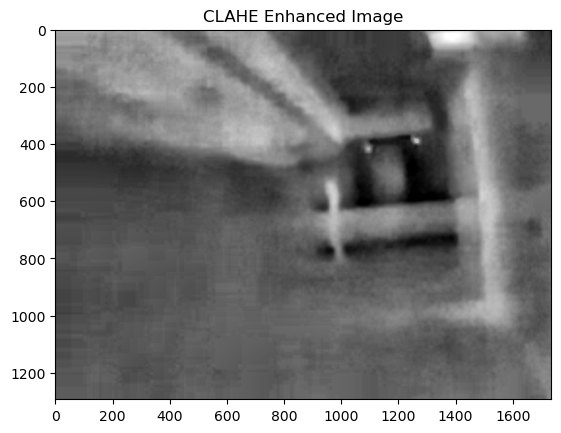

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load thermal image (grayscale)
image = cv2.imread("image.png", cv2.IMREAD_GRAYSCALE)

# Apply CLAHE for local contrast enhancement
clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(8, 8))
image_clahe = clahe.apply(image)

# Display enhanced image
plt.imshow(image_clahe, cmap='gray')
plt.title('CLAHE Enhanced Image')
plt.show()


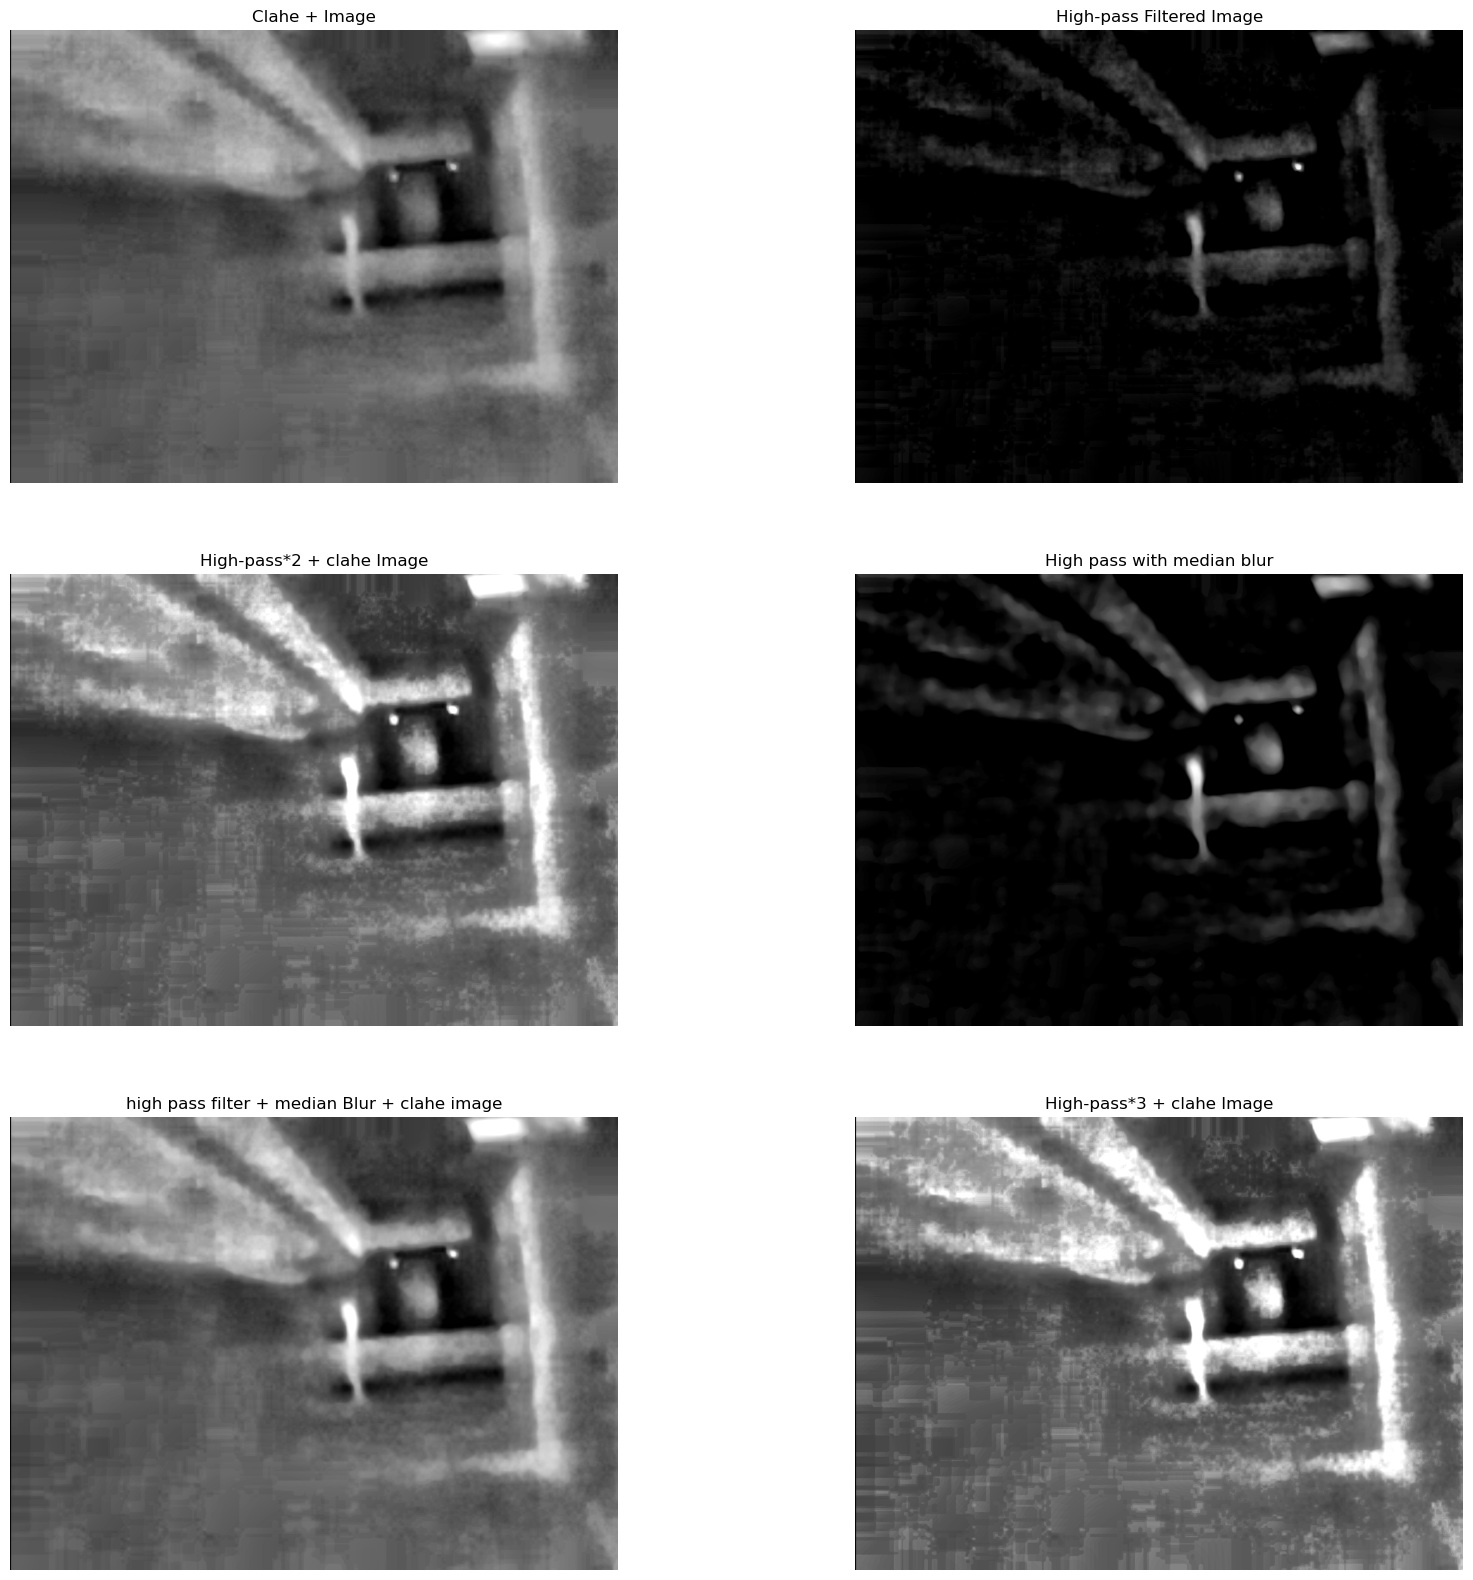

In [19]:
original = image
image = image_clahe
equalized = cv2.equalizeHist(image)

# Apply a Gaussian blur (low-pass filter)
low_pass_image = cv2.GaussianBlur(image, (299, 299), 0)
low_pass_image_original = cv2.GaussianBlur(original, (299, 299), 0)

# Subtract the low-pass filtered image from the original to get the high-pass filtered image
high_pass_image = cv2.subtract(image, low_pass_image)
high_pass_image_original = cv2.subtract(original, low_pass_image)


_, thresholded_img = cv2.threshold(high_pass_image, 30, 40, cv2.THRESH_BINARY)

end = cv2.add(image, high_pass_image)
end = cv2.add(end, high_pass_image)
end = cv2.add(end, high_pass_image) # 3 * high pass filter + image

end2 = cv2.add(image, high_pass_image)
end2 = cv2.add(end2, high_pass_image) # 2 * high pass filter + image

end3 = cv2.add(image, high_pass_image)
end3 = cv2.add(end3, high_pass_image)
end3 = cv2.add(end3, high_pass_image) # 3 * high pass filter + image


high = cv2.medianBlur(high_pass_image, 25) # high pass filter + median Blur
high2 = cv2.add(high_pass_image, high_pass_image)
high3 = cv2.add(high, high_pass_image)

final = cv2.GaussianBlur(end, (45, 45), 0) # 3 * high pass filter + image + Gaussian Blur
final2 = cv2.add(image, high) # high pass filter + median Blur + clahe image

_, mask = cv2.threshold(image, 20, 255, cv2.THRESH_BINARY)
inpainted_image = cv2.inpaint(end, mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

denoised_image = cv2.medianBlur(end, 25)

# Display the original, low-pass, and high-pass filtered images using Matplotlib
fig, axes = plt.subplots(3, 2, figsize=(20, 20))

# Original Image
axes[0][0].imshow(image, cmap='gray')
axes[0][0].set_title('Clahe + Image')
axes[0][0].axis('off')

# Low-pass filtered Image
# High-pass filtered Image
axes[0][1].imshow(high_pass_image, cmap='gray')
axes[0][1].set_title('High-pass Filtered Image')
axes[0][1].axis('off')

# High-pass + Image
# axes[1][0].imshow(end, cmap='gray')
# axes[1][0].set_title('High-pass*3 + equalized Image')
# axes[1][0].axis('off')

# axes[1][0].imshow(high_pass_image_original, cmap='gray')
# axes[1][0].set_title('High pass + original image')
# axes[1][0].axis('off')

axes[1][0].imshow(end2, cmap='gray')
axes[1][0].set_title('High-pass*2 + clahe Image')
axes[1][0].axis('off')

axes[1][1].imshow(high, cmap='gray')
axes[1][1].set_title('High pass with median blur')
axes[1][1].axis('off')

axes[2][0].imshow(final2, cmap='gray')
axes[2][0].set_title('high pass filter + median Blur + clahe image')
axes[2][0].axis('off')

axes[2][1].imshow(end3, cmap='gray')
axes[2][1].set_title('High-pass*3 + clahe Image')
axes[2][1].axis('off')

plt.show()
